                 Source: Mark Newman , Introduction to Networks || Chapter 17

 I simulated SI model for different beta and population values where S stands for the number of susceptible and I for the number of infectious. I picked beta, $\beta =$ spread rate of the infection , 0.10 , 0.25 , 0.5 , 0.75 and 1 for each population.
 


In [25]:
import networkx as nx
import numpy as np
from random import sample
import matplotlib.pyplot as plt

def Average(lst): 
    return sum(lst) / len(lst) 

### Ring Lattice generator

C:\Users\eren2\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


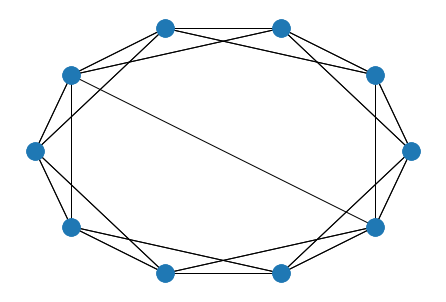

In [4]:
ws = nx.watts_strogatz_graph(10, 4, 0)
nx.draw_circular(ws)
ws.add_edge(4, 9) 
nx.draw_circular(ws)


### Network plotter

In [6]:
"""
Draws the spin lattice with colored nodes.

"""
def draw_network(network, pos=None, title=None):
    # needs a colour map for showing difference between nodes.
    cmap = [infection for node,infection in nx.get_node_attributes(network, 'infection').items()]
   
    nx.draw_circular
    nx.draw_networkx_nodes(network,pos,node_color=cmap,node_size=50,vmin=0,vmax=1)
    edgelist = [edge for edge in network.edges]
    nx.draw_networkx_edges(network, pos, edgelist,width=0.5)
    plt.title(title)
    plt.axis('off')

### Modelling

In [7]:
def update_node(old_infection,m,beta,sus):
    
    new_node_infection = old_infection + beta*sus*m #this is our differential equation, m is sum of
    #of infected neighbours.
    # while numbers of inferected persons increase suspected is decrease , we update node
    #values here
    #print(new_node_infection)
    if new_node_infection < 0:
        new_node_infection = 0
    elif new_node_infection > 1:       #set a threshold and binary encoding is it enfected or not
        new_node_infection = 1
        
    return new_node_infection          #we could use sigmoid func. if we wanted to talk with prob.

In [8]:
def update_infections_no_death(network, beta:float,sus_dict=None):
    
    infections = nx.get_node_attributes(network,'infection') #Returns Dictionary of attributes keyed by node.

    new_infections = {}
    
    for node in network.nodes: #her bir node u tek tek tarıyor
        
        old_infection = infections[node] #gives the infection information of the node
        neighbors = network.neighbors(node) #gives neigboors index of selected node
        neighbor_infections = [infections[i] for i in neighbors] # checking the situation of neighbr.
        m = sum(neighbor_infections) # sum all the numbers in the array.
        # Sus = 1 it is SI model..
        sus=1
        new_infections[node] = update_node(old_infection,m,beta,sus) # updating if the node is Infected

    return new_infections

In [35]:
def run_sim(g,beta,n_rounds,infectnumb=1):
    
    pos = nx.circular_layout(g)
    n = len(g) # total number of nodes or population..
    
    # if only number to be infected is given, choose randoms to infect
    #if type(init_infect) is int:
    init_infect_dict = {i:0 for i in range(n)}  #creates a dictionary to hold and update number of infected people
    infect_indices = sample(range(n),infectnumb) # make given number of nodes 'infected'
    for i in infect_indices:
        init_infect_dict[i] = 1
    infectnumb = init_infect_dict #updates the number of the infected people
    
    # get ready to simulate
    nx.set_node_attributes(g,infectnumb,'infection')

    #  if you want to see initial condition of network comment this out !!
    #draw_network(g,pos,'Corona starts in China..')
    #plt.show()
    
    # so far we prepared the enviroment before simulation.. and lastly make the simulation..
    count=0
    for run in range(n_runs):

        new = update_infections_no_death(g,beta)
        nx.set_node_attributes(g,new,'infection')
        #draw_network(g,pos,'Day '+str(run+1))
        #plt.show()                                       comment this out if you want to steps!
        count+=1   

        if list(new.values()) == [0]*n:
            print('infection is finished')
            break
        elif list(new.values()) == [1]*n:
            print('infection spread all over society in round ' +str(run+1))
            #print(count)
            return count
            
    

### Test

Type
thub.io/documentation/networkx-1.10/reference/generators.html

In [36]:
n_runs =200         # the game continues 200 round
infectnumb= 1          #only one person is infected


infection spread all over society in round 5
infection spread all over society in round 5
infection spread all over society in round 5
infection spread all over society in round 5
infection spread all over society in round 5
infection spread all over society in round 5
infection spread all over society in round 5
infection spread all over society in round 5
infection spread all over society in round 5
infection spread all over society in round 5
infection spread all over society in round 4
infection spread all over society in round 4
infection spread all over society in round 3
infection spread all over society in round 4
infection spread all over society in round 4
infection spread all over society in round 4
infection spread all over society in round 4
infection spread all over society in round 4
infection spread all over society in round 4
infection spread all over society in round 4
infection spread all over society in round 3
infection spread all over society in round 3
infection 

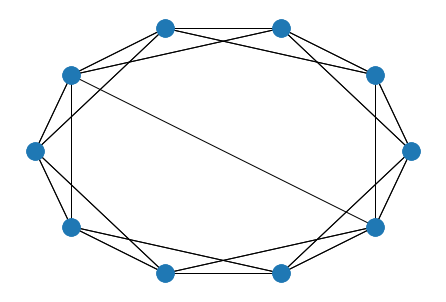

In [45]:
#first simulation for population 10 with different betas.

pop10 = nx.watts_strogatz_graph(10, 4, 0)
nx.draw_circular(pop10)
pop10.add_edge(4, 9) 
nx.draw_circular(pop10)


realizationWith0Beta10population=[]
realizationWith025Beta10population=[]
realizationWith050Beta10population=[]
realizationWith075Beta10population=[]
realizationWith1Beta10population=[]


beta = 0
for i in range(10):
    realizationWith0Beta10population.append(run_sim(pop10,beta,n_runs,infectnumb))

beta = 0.25
for i in range(10):
    realizationWith025Beta10population.append(run_sim(pop10,beta,n_runs,infectnumb))

beta = 0.50
for i in range(10):
    realizationWith050Beta10population.append(run_sim(pop10,beta,n_runs,infectnumb))
    
beta = 0.75
for i in range(10):
    realizationWith075Beta10population.append(run_sim(pop10,beta,n_runs,infectnumb))

beta = 0.1
for i in range(10):
    realizationWith1Beta10population.append(run_sim(pop10,beta,n_runs,infectnumb))




In [55]:
print(realizationWith0Beta10population)
print(realizationWith025Beta10population)
print(realizationWith050Beta10population)
print(realizationWith075Beta10population)
print(realizationWith1Beta10population)

av1 = sum(realizationWith025Beta10population) / len(realizationWith025Beta10population)
av2 = sum(realizationWith050Beta10population) / len(realizationWith050Beta10population)
av3 = sum(realizationWith075Beta10population) / len(realizationWith075Beta10population)
av4 = sum(realizationWith1Beta10population) / len(realizationWith1Beta10population)

[None, None, None, None, None, None, None, None, None, None]
[5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
[4, 4, 3, 4, 4, 4, 4, 4, 4, 4]
[3, 3, 2, 3, 3, 3, 2, 3, 3, 3]
[8, 8, 8, 10, 10, 8, 8, 10, 10, 10]


infection spread all over society in round 8
infection spread all over society in round 6
infection spread all over society in round 9
infection spread all over society in round 9
infection spread all over society in round 8
infection spread all over society in round 9
infection spread all over society in round 9
infection spread all over society in round 9
infection spread all over society in round 6
infection spread all over society in round 9
infection spread all over society in round 5
infection spread all over society in round 4
infection spread all over society in round 5
infection spread all over society in round 6
infection spread all over society in round 5
infection spread all over society in round 7
infection spread all over society in round 6
infection spread all over society in round 6
infection spread all over society in round 6
infection spread all over society in round 7
infection spread all over society in round 6
infection spread all over society in round 5
infection 

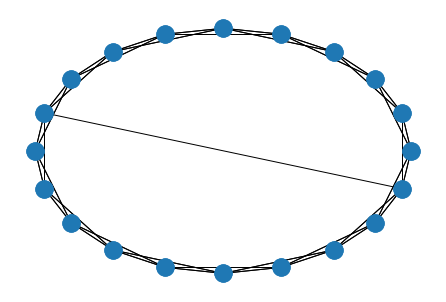

In [47]:
#first simulation for population 20 with different betas.



pop20 = nx.watts_strogatz_graph(20, 4, 0)
nx.draw_circular(pop20)
pop20.add_edge(9, 19) 
nx.draw_circular(pop20)

realizationWith0Beta20population=[]
realizationWith025Beta20population=[]
realizationWith050Beta20population=[]
realizationWith075Beta20population=[]
realizationWith1Beta20population=[]


beta = 0
for i in range(10):
    realizationWith0Beta20population.append(run_sim(pop20,beta,n_runs,infectnumb))

beta = 0.25
for i in range(10):
    realizationWith025Beta20population.append(run_sim(pop20,beta,n_runs,infectnumb))

beta = 0.50
for i in range(10):
    realizationWith050Beta20population.append(run_sim(pop20,beta,n_runs,infectnumb))
    
beta = 0.75
for i in range(10):
    realizationWith075Beta20population.append(run_sim(pop20,beta,n_runs,infectnumb))

beta = 0.1
for i in range(10):
    realizationWith1Beta20population.append(run_sim(pop20,beta,n_runs,infectnumb))

In [56]:
print(realizationWith0Beta20population)
print(realizationWith025Beta20population)
print(realizationWith050Beta20population)
print(realizationWith075Beta20population)
print(realizationWith1Beta20population)



av5 = sum(realizationWith025Beta20population) / len(realizationWith025Beta20population)
av6 = sum(realizationWith050Beta20population) / len(realizationWith050Beta20population)
av7 = sum(realizationWith075Beta20population) / len(realizationWith075Beta20population)
av8 = sum(realizationWith1Beta20population) / len(realizationWith1Beta20population)

[None, None, None, None, None, None, None, None, None, None]
[8, 6, 9, 9, 8, 9, 9, 9, 6, 9]
[5, 4, 5, 6, 5, 7, 6, 6, 6, 7]
[6, 5, 5, 5, 5, 6, 6, 4, 6, 5]
[12, 17, 17, 17, 14, 15, 17, 17, 17, 14]


infection spread all over society in round 21
infection spread all over society in round 12
infection spread all over society in round 16
infection spread all over society in round 21
infection spread all over society in round 14
infection spread all over society in round 17
infection spread all over society in round 15
infection spread all over society in round 21
infection spread all over society in round 21
infection spread all over society in round 14
infection spread all over society in round 10
infection spread all over society in round 12
infection spread all over society in round 10
infection spread all over society in round 9
infection spread all over society in round 15
infection spread all over society in round 11
infection spread all over society in round 12
infection spread all over society in round 14
infection spread all over society in round 10
infection spread all over society in round 14
infection spread all over society in round 11
infection spread all over society i

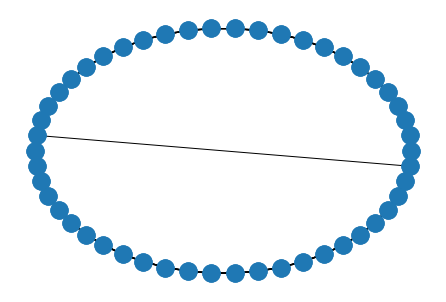

In [49]:
#first simulation for population 50 with different betas.


pop50 = nx.watts_strogatz_graph(50, 4, 0)
nx.draw_circular(pop50)
pop50.add_edge(24, 49) 
nx.draw_circular(pop50)

realizationWith0Beta50population=[]
realizationWith025Beta50population=[]
realizationWith050Beta50population=[]
realizationWith075Beta50population=[]
realizationWith1Beta50population=[]

beta = 0
for i in range(10):
    realizationWith0Beta50population.append(run_sim(pop50,beta,n_runs,infectnumb))

beta = 0.25
for i in range(10):
    realizationWith025Beta50population.append(run_sim(pop50,beta,n_runs,infectnumb))

beta = 0.50
for i in range(10):
    realizationWith050Beta50population.append(run_sim(pop50,beta,n_runs,infectnumb))
    
beta = 0.75
for i in range(10):
    realizationWith075Beta50population.append(run_sim(pop50,beta,n_runs,infectnumb))

beta = 0.1
for i in range(10):
    realizationWith1Beta50population.append(run_sim(pop50,beta,n_runs,infectnumb))

In [57]:
print(realizationWith0Beta50population)
print(realizationWith025Beta50population)
print(realizationWith050Beta50population)
print(realizationWith075Beta50population)
print(realizationWith1Beta50population)

av9 = sum(realizationWith025Beta50population) / len(realizationWith025Beta50population)
av10 = sum(realizationWith050Beta50population) / len(realizationWith050Beta50population)
av11 = sum(realizationWith075Beta50population) / len(realizationWith075Beta50population)
av12 = sum(realizationWith1Beta50population) / len(realizationWith1Beta50population)

[None, None, None, None, None, None, None, None, None, None]
[21, 12, 16, 21, 14, 17, 15, 21, 21, 14]
[10, 12, 10, 9, 15, 11, 12, 14, 10, 14]
[11, 11, 9, 13, 8, 14, 12, 13, 11, 8]
[37, 38, 23, 40, 29, 38, 38, 40, 34, 37]


infection spread all over society in round 59
infection spread all over society in round 62
infection spread all over society in round 50
infection spread all over society in round 79
infection spread all over society in round 49
infection spread all over society in round 50
infection spread all over society in round 73
infection spread all over society in round 65
infection spread all over society in round 42
infection spread all over society in round 81
infection spread all over society in round 54
infection spread all over society in round 32
infection spread all over society in round 50
infection spread all over society in round 43
infection spread all over society in round 45
infection spread all over society in round 52
infection spread all over society in round 32
infection spread all over society in round 43
infection spread all over society in round 44
infection spread all over society in round 32
infection spread all over society in round 35
infection spread all over society 

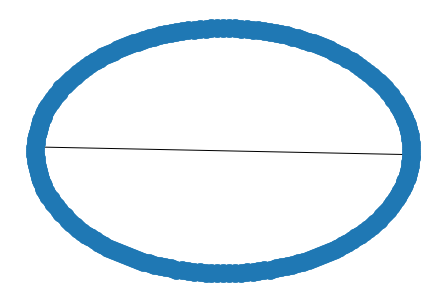

In [51]:
pop200 = nx.watts_strogatz_graph(200, 4, 0)
nx.draw_circular(pop200)
pop200.add_edge(99, 199) 
nx.draw_circular(pop200)

realizationWith0Beta200population=[]
realizationWith025Beta200population=[]
realizationWith050Beta200population=[]
realizationWith075Beta200population=[]
realizationWith1Beta200population=[]


beta = 0
for i in range(10):
    realizationWith0Beta200population.append(run_sim(pop200,beta,n_runs,infectnumb))

beta = 0.25
for i in range(10):
    realizationWith025Beta200population.append(run_sim(pop200,beta,n_runs,infectnumb))

beta = 0.50
for i in range(10):
    realizationWith050Beta200population.append(run_sim(pop200,beta,n_runs,infectnumb))
    
beta = 0.75
for i in range(10):
    realizationWith075Beta200population.append(run_sim(pop200,beta,n_runs,infectnumb))

beta = 0.1
for i in range(10):
    realizationWith1Beta200population.append(run_sim(pop200,beta,n_runs,infectnumb))

In [58]:
print(realizationWith0Beta200population)
print(realizationWith025Beta200population)
print(realizationWith050Beta200population)
print(realizationWith075Beta200population)
print(realizationWith1Beta200population)


av13 = sum(realizationWith025Beta200population) / len(realizationWith025Beta200population)
av14 = sum(realizationWith050Beta200population) / len(realizationWith050Beta200population)
av15 = sum(realizationWith075Beta200population) / len(realizationWith075Beta200population)
av16 = sum(realizationWith1Beta200population) / len(realizationWith1Beta200population)

[None, None, None, None, None, None, None, None, None, None]
[59, 62, 50, 79, 49, 50, 73, 65, 42, 81]
[54, 32, 50, 43, 45, 52, 32, 43, 44, 32]
[35, 35, 47, 29, 31, 53, 29, 53, 48, 37]
[110, 146, 112, 98, 127, 120, 82, 126, 103, 146]


Text(0, 0.5, 'beta')

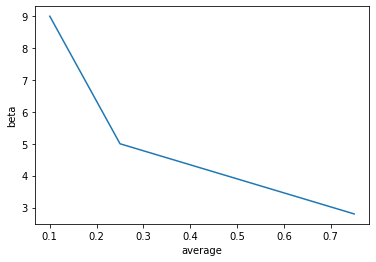

In [66]:

plt.plot([0.1, 0.25, 0.5, 0.75], [av4, av1, av2, av3])
plt.xlabel('average')
plt.ylabel('beta')


Text(0, 0.5, 'beta')

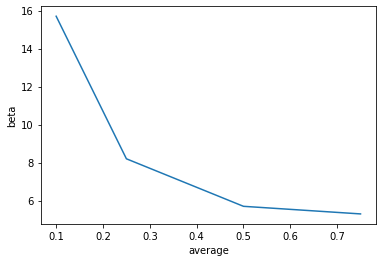

In [69]:
plt.plot([0.1, 0.25, 0.5, 0.75], [av8, av5, av6, av7])
plt.xlabel('average')
plt.ylabel('beta')

Text(0, 0.5, 'beta')

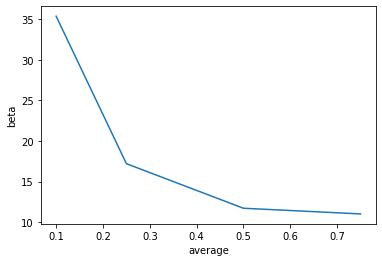

In [68]:
plt.plot([0.1, 0.25, 0.5, 0.75], [av12, av9, av10, av11])
plt.xlabel('average')
plt.ylabel('beta')

Text(0, 0.5, 'beta')

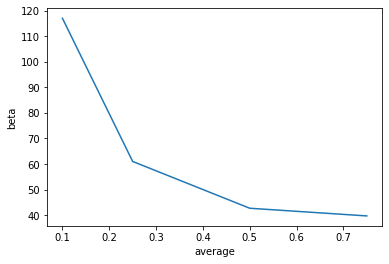

In [67]:
plt.plot([0.1, 0.25, 0.5, 0.75], [av16, av13, av14, av15])
plt.xlabel('average')
plt.ylabel('beta')

In [77]:
print("the averages of pop 10 for 0,1, 0,25, 0,5, 0,75 beta: " + str(av4) + " " +  str(av1) + " " +  str(av2) + " " +  str(av3))
print("the averages of pop 20 for 0,1, 0,25, 0,5, 0,75 beta: " + str(av8) + " " +  str(av5)+ " " +  str(av6) + " " +  str(av7))
print("the averages of pop 50 for 0,1, 0,25, 0,5, 0,75 beta: " + str(av12) + " " +  str(av9)+ " " +  str(av10) + " " +  str(av11))
print("the averages of pop 200 for 0,1, 0,25, 0,5, 0,75 beta: " + str(av16) + " " +  str(av13)+ " " +  str(av14) + " " +  str(av15))

the averages of pop 10 for 0,1, 0,25, 0,5, 0,75 beta: 9.0 5.0 3.9 2.8
the averages of pop 20 for 0,1, 0,25, 0,5, 0,75 beta: 15.7 8.2 5.7 5.3
the averages of pop 50 for 0,1, 0,25, 0,5, 0,75 beta: 35.4 17.2 11.7 11.0
the averages of pop 200 for 0,1, 0,25, 0,5, 0,75 beta: 117.0 61.0 42.7 39.7
